<a href="https://colab.research.google.com/github/sigma-asif/data-communication-lab/blob/main/digital_to_analog_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

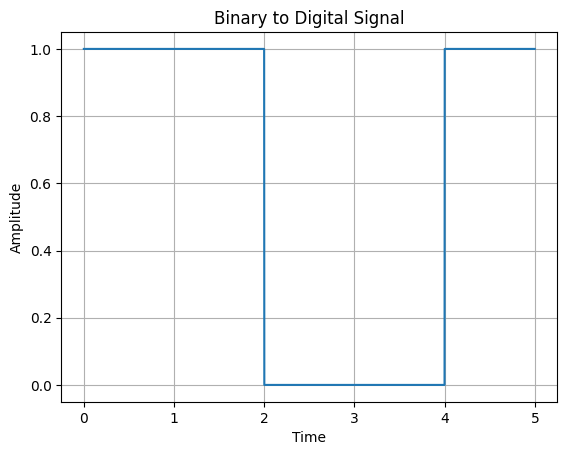

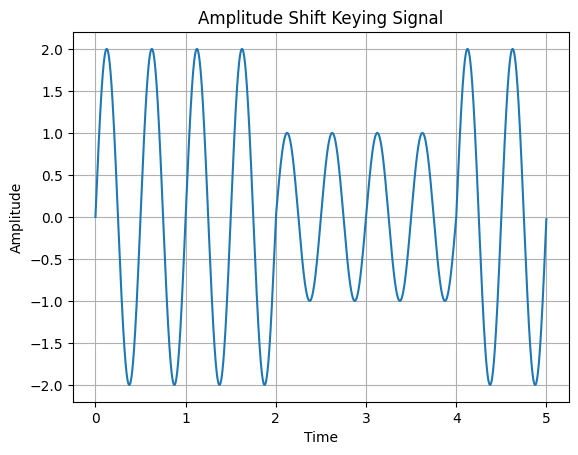

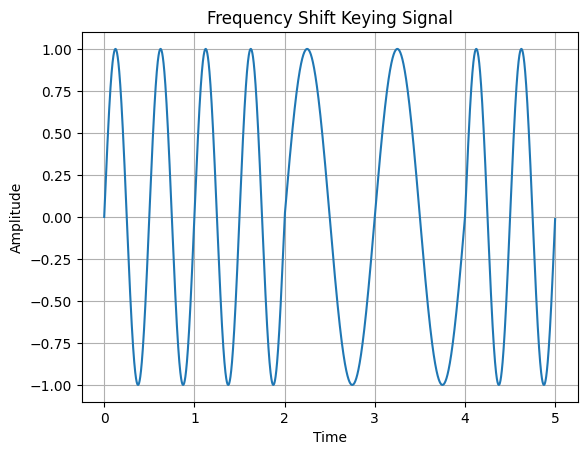

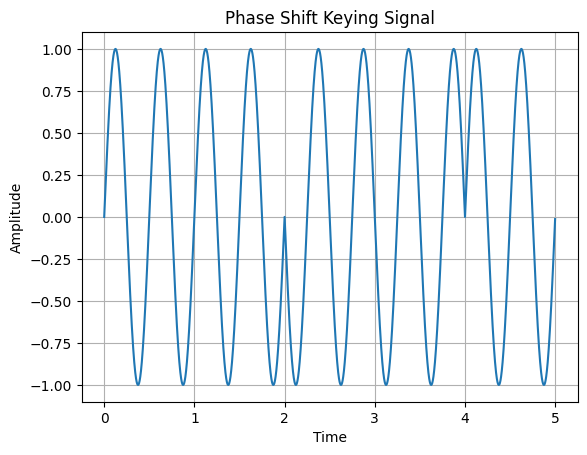

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def binary_to_digital(binary_list, sampling_rate):
    h = 1
    l = 0
    signal = []
    for i in binary_list:
        if i == 1:
            signal.extend([h] * sampling_rate)
        else:
            signal.extend([l] * sampling_rate)
    return np.array(signal)

def amplitude_shift_keying(binary_list, A1, A2, f, sampling_rate):
    t = np.linspace(0, len(binary_list), len(binary_list) * sampling_rate, endpoint=False)
    signal = []
    for bit in binary_list:
        start_index = len(signal)
        end_index = start_index + sampling_rate
        if bit == 1:
            signal.extend(A1 * np.sin(2 * np.pi * f * t[start_index:end_index]))
        else:
            signal.extend(A2 * np.sin(2 * np.pi * f * t[start_index:end_index]))
    return t, np.array(signal)

def frequency_shift_keying(binary_list, f1, f2, sampling_rate):
    t = np.linspace(0, len(binary_list), len(binary_list) * sampling_rate, endpoint=False)
    signal = []
    for bit in binary_list:
        start_index = len(signal)
        end_index = start_index + sampling_rate
        if bit == 1:
            signal.extend(np.sin(2 * np.pi * f1 * t[start_index:end_index]))
        else:
            signal.extend(np.sin(2 * np.pi * f2 * t[start_index:end_index]))
    return t, np.array(signal)

def phase_shift_keying(binary_list, f, sampling_rate):
    t = np.linspace(0, len(binary_list), len(binary_list) * sampling_rate, endpoint=False)
    signal = []
    for bit in binary_list:
        start_index = len(signal)
        end_index = start_index + sampling_rate
        if bit == 1:
            # No phase shift for bit = 1
            signal.extend(np.sin(2 * np.pi * f * t[start_index:end_index]))
        else:
            # Phase shift by 180 degrees (π radians) for bit = 0
            signal.extend(np.sin(2 * np.pi * f * t[start_index:end_index] + np.pi))
    return t, np.array(signal)

def plot_signal(t, signal, title):
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def main():
    binary_list = [1, 1, 0, 0, 1]
    sampling_rate = 1000
    f1 = 2  # Frequency of the first carrier signal in Hz
    f2 = 1  # Frequency of the second carrier signal in Hz
    A1 = 2  # Amplitude for bit = 1
    A2 = 1  # Amplitude for bit = 0
    f = 2   # Carrier frequency for PSK

    # Binary to Digital Signal
    digital_signal = binary_to_digital(binary_list, sampling_rate)
    t_digital = np.linspace(0, len(binary_list), len(digital_signal), endpoint=False)
    plot_signal(t_digital, digital_signal, 'Binary to Digital Signal')

    # Amplitude Shift Keying Signal
    t_ask, ask_signal = amplitude_shift_keying(binary_list, A1, A2, f1, sampling_rate)
    plot_signal(t_ask, ask_signal, 'Amplitude Shift Keying Signal')

    # Frequency Shift Keying Signal
    t_fsk, fsk_signal = frequency_shift_keying(binary_list, f1, f2, sampling_rate)
    plot_signal(t_fsk, fsk_signal, 'Frequency Shift Keying Signal')

    # Phase Shift Keying Signal
    t_psk, psk_signal = phase_shift_keying(binary_list, f, sampling_rate)
    plot_signal(t_psk, psk_signal, 'Phase Shift Keying Signal')

if __name__ == '__main__':
    main()

